### Student Number : 2
#### Alexandre Lemonnier (alexandre.lemonnier) (23077)
#### Victor Simonin (victor.simonin) (23093)

First, let's import our useful libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz -P /content/drive/MyDrive # link wrong in blog
!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz -P /content/drive/MyDrive
!tar xf /content/drive/MyDrive/spark-3.0.3-bin-hadoop2.7.tgz
# !tar xf /content/drive/Shareddrives/DA231-2022-public/spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

Mounted at /content/drive


#### ***PySpark Setup***

In [2]:
!pip install -q findspark

In [3]:
#Provides findspark.init() to make pyspark importable as a regular library.
# Resource : https://pypi.org/project/findspark/
import findspark
findspark.init()

In [4]:
findspark.find()

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col, isnull, mean, abs, max, avg, lag, lead, udf, struct, lit, variance, weekofyear, month, year
from pyspark.sql.window import Window
from datetime import timedelta, datetime
from pyspark.ml.stat import Correlation
from sklearn.preprocessing import normalize
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [6]:
# spark_application_name = "Projet_LAVS"
# spark = (SparkSession.builder.appName(spark_application_name).getOrCreate())

Here we define the structure of the schema and its columns with their relative types

In [8]:
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from glob import glob

from pyspark.sql.types import StructType, StructField, StringType, DoubleType, TimestampType
from pyspark.sql import functions
from pyspark.sql.functions import input_file_name, substring, regexp_extract, col
import pandas as pd
import ast
import re

from pyspark.sql.functions import col


In [9]:
schema = StructType([StructField("date",TimestampType(),True),
                     StructField("open",DoubleType(),True),
                     StructField("high",DoubleType(),True),
                     StructField("low",DoubleType(),True),
                     StructField("close",DoubleType(),True),
                     StructField("volume",DoubleType(),True)])

In [10]:
import glob

In [11]:
Stock_DataPath = '/content/drive/MyDrive/hourly-data/*.txt'

# files = glob.glob(path+"/*.txt")

In [13]:
# Stock_DataPath = "/Users/d0d02tr/Desktop/hourly-data/*.txt"
#Stock_DataPath = "/content/drive/MyDrive/DE_Project/2_company_data/*.txt"
# nifty50_stocks = "/Users/d0d02tr/Desktop/ind_nifty50list.csv"
file_list = glob.glob(Stock_DataPath)
#print(f"Total number of companies data: {len(file_list)}")

In [35]:
content_list = ['/content/drive/MyDrive/hourly-data/INFOSYS._hourly_data_bse.txt',
'/content/drive/MyDrive/hourly-data/ITC._hourly_data_bse.txt',
'/content/drive/MyDrive/hourly-data/WIPRO._hourly_data_bse.txt',
'/content/drive/MyDrive/hourly-data/HCL TECHNOLOGIES._hourly_data_bse.txt',
'/content/drive/MyDrive/hourly-data/TECH MAHINDRA._hourly_data_bse.txt',
'/content/drive/MyDrive/hourly-data/L&T TECHNOLOGY SERVICES LIMITE_hourly_data_bse.txt',
'/content/drive/MyDrive/hourly-data/TATA CONSULTANCY SERVICES._hourly_data_bse.txt'
]

In [36]:
stock_df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .schema(schema) \
    .json(content_list) \
    .withColumn("company", regexp_extract(input_file_name(), "/([^/]+)$", 1))

# nifty50_df = spark.read.csv(nifty50_stocks, header=True, inferSchema=True).withColumnRenamed('Company Name', 'company')
#nifty50_df.printSchema()

stock_df.show()

#hourly_df = stock_df.join(nifty50_df,
 #                       nifty50_df.company == stock_df.company,
 #                       how='inner')


+-------------------+-------+-------+-------+-------+-------+--------------------+
|               date|   open|   high|    low|  close| volume|             company|
+-------------------+-------+-------+-------+-------+-------+--------------------+
|2022-10-06 09:15:00| 3103.0| 3124.1| 3095.0|3113.05|39216.0|TATA%20CONSULTANC...|
|2022-10-06 10:15:00|3113.05| 3116.9| 3103.0|3107.95|16127.0|TATA%20CONSULTANC...|
|2022-10-06 11:15:00|3107.95| 3111.0|3097.55| 3108.9|35254.0|TATA%20CONSULTANC...|
|2022-10-06 12:15:00| 3108.9| 3112.8| 3106.1| 3107.1|58331.0|TATA%20CONSULTANC...|
|2022-10-06 13:15:00| 3107.1| 3111.9| 3098.0| 3103.0| 8390.0|TATA%20CONSULTANC...|
|2022-10-06 14:15:00| 3103.0| 3110.0|3100.35| 3103.0|22737.0|TATA%20CONSULTANC...|
|2022-10-06 15:15:00| 3103.0| 3105.0| 3092.5|3095.95| 5128.0|TATA%20CONSULTANC...|
|2022-10-07 09:15:00| 3099.0|3104.85|3076.35| 3093.8|23779.0|TATA%20CONSULTANC...|
|2022-10-07 10:15:00|3095.95|3095.95|3063.15|3066.05|12461.0|TATA%20CONSULTANC...|
|202

**Read data into Dataframe with file names also as an**

In [37]:
stock_df.show()

+-------------------+-------+-------+-------+-------+-------+--------------------+
|               date|   open|   high|    low|  close| volume|             company|
+-------------------+-------+-------+-------+-------+-------+--------------------+
|2022-10-06 09:15:00| 3103.0| 3124.1| 3095.0|3113.05|39216.0|TATA%20CONSULTANC...|
|2022-10-06 10:15:00|3113.05| 3116.9| 3103.0|3107.95|16127.0|TATA%20CONSULTANC...|
|2022-10-06 11:15:00|3107.95| 3111.0|3097.55| 3108.9|35254.0|TATA%20CONSULTANC...|
|2022-10-06 12:15:00| 3108.9| 3112.8| 3106.1| 3107.1|58331.0|TATA%20CONSULTANC...|
|2022-10-06 13:15:00| 3107.1| 3111.9| 3098.0| 3103.0| 8390.0|TATA%20CONSULTANC...|
|2022-10-06 14:15:00| 3103.0| 3110.0|3100.35| 3103.0|22737.0|TATA%20CONSULTANC...|
|2022-10-06 15:15:00| 3103.0| 3105.0| 3092.5|3095.95| 5128.0|TATA%20CONSULTANC...|
|2022-10-07 09:15:00| 3099.0|3104.85|3076.35| 3093.8|23779.0|TATA%20CONSULTANC...|
|2022-10-07 10:15:00|3095.95|3095.95|3063.15|3066.05|12461.0|TATA%20CONSULTANC...|
|202

In [38]:
stock_df = stock_df.withColumn('symbol', functions.split('company', '_hourly')[0]).withColumn('symbol', functions.expr("replace(symbol, '%20', ' ')"))

In [39]:
stock_df.show()

+-------------------+-------+-------+-------+-------+-------+--------------------+--------------------+
|               date|   open|   high|    low|  close| volume|             company|              symbol|
+-------------------+-------+-------+-------+-------+-------+--------------------+--------------------+
|2022-10-06 09:15:00| 3103.0| 3124.1| 3095.0|3113.05|39216.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2022-10-06 10:15:00|3113.05| 3116.9| 3103.0|3107.95|16127.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2022-10-06 11:15:00|3107.95| 3111.0|3097.55| 3108.9|35254.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2022-10-06 12:15:00| 3108.9| 3112.8| 3106.1| 3107.1|58331.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2022-10-06 13:15:00| 3107.1| 3111.9| 3098.0| 3103.0| 8390.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2022-10-06 14:15:00| 3103.0| 3110.0|3100.35| 3103.0|22737.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2022-10-06 15:15:00| 3103.0| 3105.0| 3092.5|3095.95| 5128.0|TAT

In [40]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from pyspark.sql.types import TimestampType

# Assuming you already have a SparkSession named spark

# Convert string date to timestamp type
stock_df = stock_df.withColumn("date", col("date").cast(TimestampType()))

# Define the date range
start_date = "2017-01-03"
end_date = "2020-12-02"

# Filter based on company names and date range
filtered_stocks = stock_df.filter(
    (col("date").between(lit(start_date), lit(end_date)))
)

# Show the resulting DataFrame
filtered_stocks.show()
# L&T Technology Services Ltd

+-------------------+-------+-------+-------+-------+--------+--------------------+--------------------+
|               date|   open|   high|    low|  close|  volume|             company|              symbol|
+-------------------+-------+-------+-------+-------+--------+--------------------+--------------------+
|2020-07-28 09:15:00| 2214.0| 2264.8| 2214.0| 2251.5| 37551.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2020-07-28 10:15:00| 2251.5| 2263.1| 2247.1| 2258.5| 11356.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2020-07-28 11:15:00| 2258.5|2278.35| 2248.0| 2277.1|150222.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2020-07-28 12:15:00| 2277.1| 2288.0|2268.65| 2282.5| 28591.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2020-07-28 13:15:00| 2281.5| 2294.0| 2280.0|2289.55| 40906.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2020-07-28 14:15:00|2289.55| 2320.0|2287.95| 2315.3| 55717.0|TATA%20CONSULTANC...|TATA CONSULTANCY ...|
|2020-07-28 15:15:00| 2314.0| 2318.0| 2303.5|2310.85| 2

In [42]:
from pyspark.sql import functions as F

# Group by date and symbol, compute average for other double columns
aggregated_stocks = filtered_stocks.groupBy("date", "symbol").agg(
    F.avg("open").alias("Open"),
    F.avg("high").alias("High"),
    F.avg("low").alias("Low"),
    F.avg("close").alias("Close"),
    F.avg("volume").alias("Volume")
)


aggregated_stocks = aggregated_stocks \
    .withColumnRenamed("symbol", "company_name") \
    .withColumnRenamed("date", "Date")


# Show the resulting DataFrame
aggregated_stocks.show()


+-------------------+--------------------+-------+-------+-------+-------+--------+
|               Date|        company_name|   Open|   High|    Low|  Close|  Volume|
+-------------------+--------------------+-------+-------+-------+-------+--------+
|2019-11-04 15:15:00|TATA CONSULTANCY ...|2195.25|2196.35|2187.35|2194.95| 29259.0|
|2020-09-25 09:15:00|            INFOSYS.|  985.0|  997.0|  977.0|  990.0|118115.0|
|2020-10-08 10:15:00|            INFOSYS.|1102.55|1108.85| 1099.0| 1107.6| 64683.0|
|2020-10-29 12:15:00|            INFOSYS.|1070.25| 1074.0|1066.75|1070.55| 25708.0|
|2020-11-11 12:15:00|            INFOSYS.| 1107.7|1109.65| 1102.7| 1106.8| 19117.0|
|2020-11-25 09:15:00|            INFOSYS.| 1139.0| 1140.5| 1123.0| 1123.0| 53413.0|
|2019-12-16 11:15:00|            INFOSYS.|  717.4| 717.85|  715.1| 716.75| 75160.0|
|2020-11-18 09:15:00|      TECH MAHINDRA.|  843.0|  843.5| 832.05|  837.0| 26765.0|
|2019-12-30 15:15:00|      TECH MAHINDRA.| 781.65| 782.85|  781.0|  781.0|  

In [44]:
from pyspark.sql.functions import col, date_format

aggregated_stocks = aggregated_stocks.withColumn("Date", date_format(col("Date"), "yyyy-MM-dd"))
aggregated_stocks.show()

+----------+--------------------+-------+-------+-------+-------+--------+
|      Date|        company_name|   Open|   High|    Low|  Close|  Volume|
+----------+--------------------+-------+-------+-------+-------+--------+
|2019-11-04|TATA CONSULTANCY ...|2195.25|2196.35|2187.35|2194.95| 29259.0|
|2020-09-25|            INFOSYS.|  985.0|  997.0|  977.0|  990.0|118115.0|
|2020-10-08|            INFOSYS.|1102.55|1108.85| 1099.0| 1107.6| 64683.0|
|2020-10-29|            INFOSYS.|1070.25| 1074.0|1066.75|1070.55| 25708.0|
|2020-11-11|            INFOSYS.| 1107.7|1109.65| 1102.7| 1106.8| 19117.0|
|2020-11-25|            INFOSYS.| 1139.0| 1140.5| 1123.0| 1123.0| 53413.0|
|2019-12-16|            INFOSYS.|  717.4| 717.85|  715.1| 716.75| 75160.0|
|2020-11-18|      TECH MAHINDRA.|  843.0|  843.5| 832.05|  837.0| 26765.0|
|2019-12-30|      TECH MAHINDRA.| 781.65| 782.85|  781.0|  781.0|  2610.0|
|2020-10-22|L&T TECHNOLOGY SE...| 1742.1| 1752.0| 1731.7| 1748.6|  1321.0|
|2020-11-09|L&T TECHNOLOG

## Exploration of the datasets (part 1)

Now let's do the exploration of our datasets :

In [45]:
# Show the first and last 40 rows of each stock price
def head_tail_40(dataset):
    print("Head/tail 40 rows of the dataset", dataset.head().company_name)
    print("\nThe 40 first elements : ")
    spark.createDataFrame(dataset.head(40)).show(40)

    print("\nThe 40 last elements : ")
    spark.createDataFrame(dataset.tail(40)).show(40)

In [46]:
# Example
# head_tail_40(amazon)

In [ ]:
def get_number_of_observation(dataset):
    print(f"The total number of observations of {dataset.head().company_name} dataset:", dataset.count())

In [47]:
# Example
# get_number_of_observation(amazon)

In [ ]:
def get_time_delta(dataset):
    print("The first date is", dataset.head().Date)
    print("The second date is", dataset.head(2)[1].Date)
    delta = dataset.head(2)[1].Date - dataset.head().Date
    print(f"So we deduce the timedelta for {dataset.head().company_name} dataset is {delta}")


In [172]:
aggregated_stocks.select('company_name').distinct().show(truncate=False)

+------------------------------+
|company_name                  |
+------------------------------+
|ITC.                          |
|WIPRO.                        |
|TATA CONSULTANCY SERVICES.    |
|HCL TECHNOLOGIES.             |
|INFOSYS.                      |
|TECH MAHINDRA.                |
|L&T TECHNOLOGY SERVICES LIMITE|
+------------------------------+



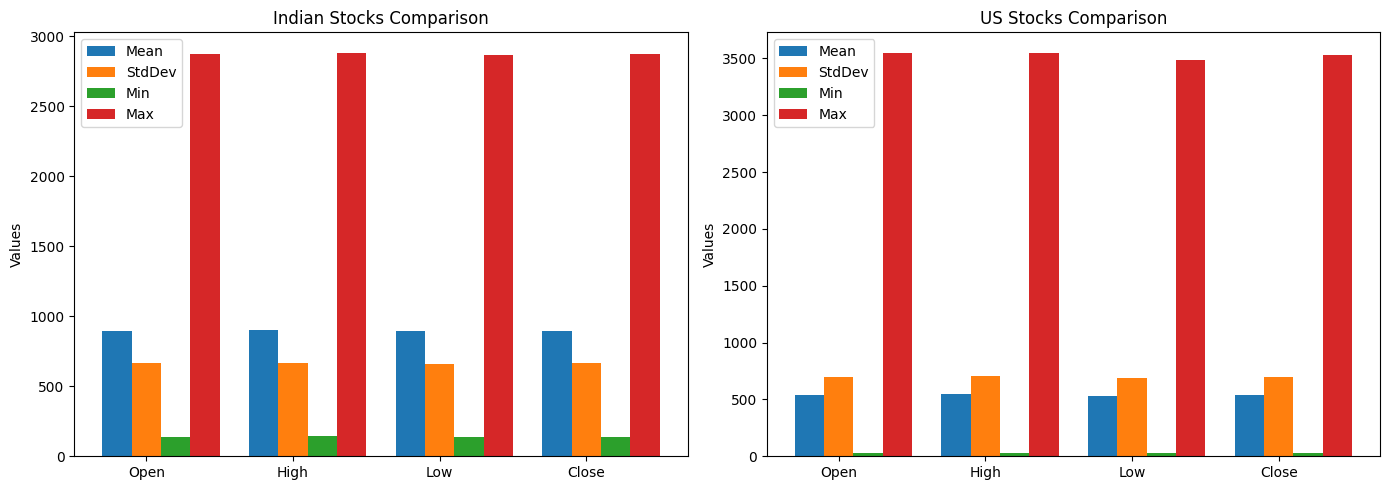

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Summary statistics data
columns = ['Open', 'High', 'Low', 'Close']
mean_values_indian = [896.4897284853702, 900.3897108433735, 892.3355051635112, 896.3236308089497]
stddev_values_indian = [665.3174394169338, 668.0226358831858, 662.4560586758886, 665.2092862921048]
min_values_indian = [137.05, 141.35, 134.95, 136.55]
max_values_indian = [2874.0, 2884.8, 2864.25, 2876.5]

mean_values_us = [537.936037946346, 544.0228364162303, 531.5214318489739, 538.0659504301191]
stddev_values_us = [696.8556864449436, 704.5601710027677, 688.26142261336, 696.675025729266]
min_values_us = [28.95, 29.0825, 28.69, 29.005]
max_values_us = [3547.0, 3552.25, 3486.69, 3531.45]

bar_width = 0.2
bar_space = 0.2  # Additional space between groups of bars
index = np.arange(len(columns))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plotting Indian Stocks
axs[0].bar(index, mean_values_indian, bar_width, label='Mean')
axs[0].bar(index + bar_width *1, stddev_values_indian, bar_width, label='StdDev')
axs[0].bar(index + 2 * (bar_width ), min_values_indian, bar_width, label='Min')
axs[0].bar(index + 3 * (bar_width ), max_values_indian, bar_width, label='Max')
axs[0].set_xticks(index + 1*(bar_width))
axs[0].set_xticklabels(columns)
axs[0].set_title('Indian Stocks Comparison')
axs[0].set_ylabel('Values')
axs[0].legend()

# Plotting US Stocks
axs[1].bar(index, mean_values_us, bar_width, label='Mean')
axs[1].bar(index + bar_width , stddev_values_us, bar_width, label='StdDev')
axs[1].bar(index + 2 * (bar_width ), min_values_us, bar_width, label='Min')
axs[1].bar(index + 3 * (bar_width ), max_values_us, bar_width, label='Max')
axs[1].set_xticks(index +(bar_width))
axs[1].set_xticklabels(columns)
axs[1].set_title('US Stocks Comparison')
axs[1].set_ylabel('Values')
axs[1].legend()

plt.tight_layout()
plt.show()


In [191]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Summary statistics data
# columns = ['Open', 'High', 'Low', 'Close']
# mean_values_indian = [896.4897284853702, 900.3897108433735, 892.3355051635112, 896.3236308089497]
# stddev_values_indian = [665.3174394169338, 668.0226358831858, 662.4560586758886, 665.2092862921048]
# min_values_indian = [137.05, 141.35, 134.95, 136.55]
# max_values_indian = [2874.0, 2884.8, 2864.25, 2876.5]

# mean_values_us = [537.936037946346, 544.0228364162303, 531.5214318489739, 538.0659504301191]
# stddev_values_us = [696.8556864449436, 704.5601710027677, 688.26142261336, 696.675025729266]
# min_values_us = [28.95, 29.0825, 28.69, 29.005]
# max_values_us = [3547.0, 3552.25, 3486.69, 3531.45]

# bar_width = 0.2
# bar_space = 0.2  # Additional space between groups of bars
# index = np.arange(len(columns))

# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# # Plotting mean values
# axs[0].bar(index, mean_values_indian, bar_width, label='Indian Stocks - Mean')
# axs[0].bar(index + bar_width + bar_space, stddev_values_indian, bar_width, label='Indian Stocks - Std')

# # Plotting standard deviation values
# axs[1].bar(index, mean_values_us, bar_width, label='US Stocks - Mean')
# axs[1].bar(index + bar_width + bar_space, stddev_values_us, bar_width, label='US Stocks - Std')


# # axs[2].bar(index, mean_values_indian, bar_width, label='Indian Stocks - Mean')
# # axs[2].bar(index + bar_width + bar_space, mean_values_us, bar_width, label='US Stocks - Mean')

# # # Plotting standard deviation values
# # axs[3].bar(index, stddev_values_indian, bar_width, label='Indian Stocks - StdDev')
# # axs[3].bar(index + bar_width + bar_space, stddev_values_us, bar_width, label='US Stocks - StdDev')

# for ax in axs:
#     ax.set_xlabel('Feat')
#     ax.set_ylabel('Values')
#     ax.legend()

# axs[0].set_title('Mean Values Comparison')
# axs[1].set_title('Standard Deviation Values Comparison')
# # axs[2].set_title('Standard Deviation Values Comparison')
# # axs[3].set_title('Standard Deviation Values Comparison')


# plt.tight_layout()
# plt.show()


In [54]:
aggregated_stocks.select('Open','High','Low','Close','Volume').summary().show()

+-------+-----------------+-----------------+-----------------+-----------------+-----------------+
|summary|             Open|             High|              Low|            Close|           Volume|
+-------+-----------------+-----------------+-----------------+-----------------+-----------------+
|  count|            23240|            23240|            23240|            23240|            23240|
|   mean|896.4897284853702|900.3897108433735|892.3355051635112|896.3236308089497|47215.26691049914|
| stddev|665.3174394169338|668.0226358831858|662.4560586758886|665.2092862921048|278277.1979816811|
|    min|           137.05|           141.35|           134.95|           136.55|              5.0|
|    25%|            292.8|           293.85|           291.95|           292.65|           5509.0|
|    50%|           712.55|            715.0|           709.65|           712.55|          15934.0|
|    75%|          1467.45|           1473.8|          1460.05|           1467.0|          43113.0|


In [55]:
# Correlation matrix plot function
def plot_corr_matrix(correlations,attr,fig_no):
    fig = plt.figure(figsize=(15, 12))
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

In [56]:
def get_values_correlation(dataset):
    print(f"Correlation matrix for {dataset.head().company_name} dataset:")
    vector_col = "corr_features"
    assembler = VectorAssembler(inputCols=['High', 'Low', 'Open', 'Close', 'Volume'], outputCol=vector_col)
    df_vector = assembler.transform(dataset).select(vector_col)

    # get correlation matrix
    matrix = Correlation.corr(df_vector, vector_col)
    cor_np = matrix.collect()[0][matrix.columns[0]].toArray()
    plot_corr_matrix(cor_np, ['High', 'Low', 'Open', 'Close', 'Volume'], 234)

Correlation matrix for INFOSYS. dataset:


<ipython-input-55-a78df6bc5a0e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+attr)
<ipython-input-55-a78df6bc5a0e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+attr)


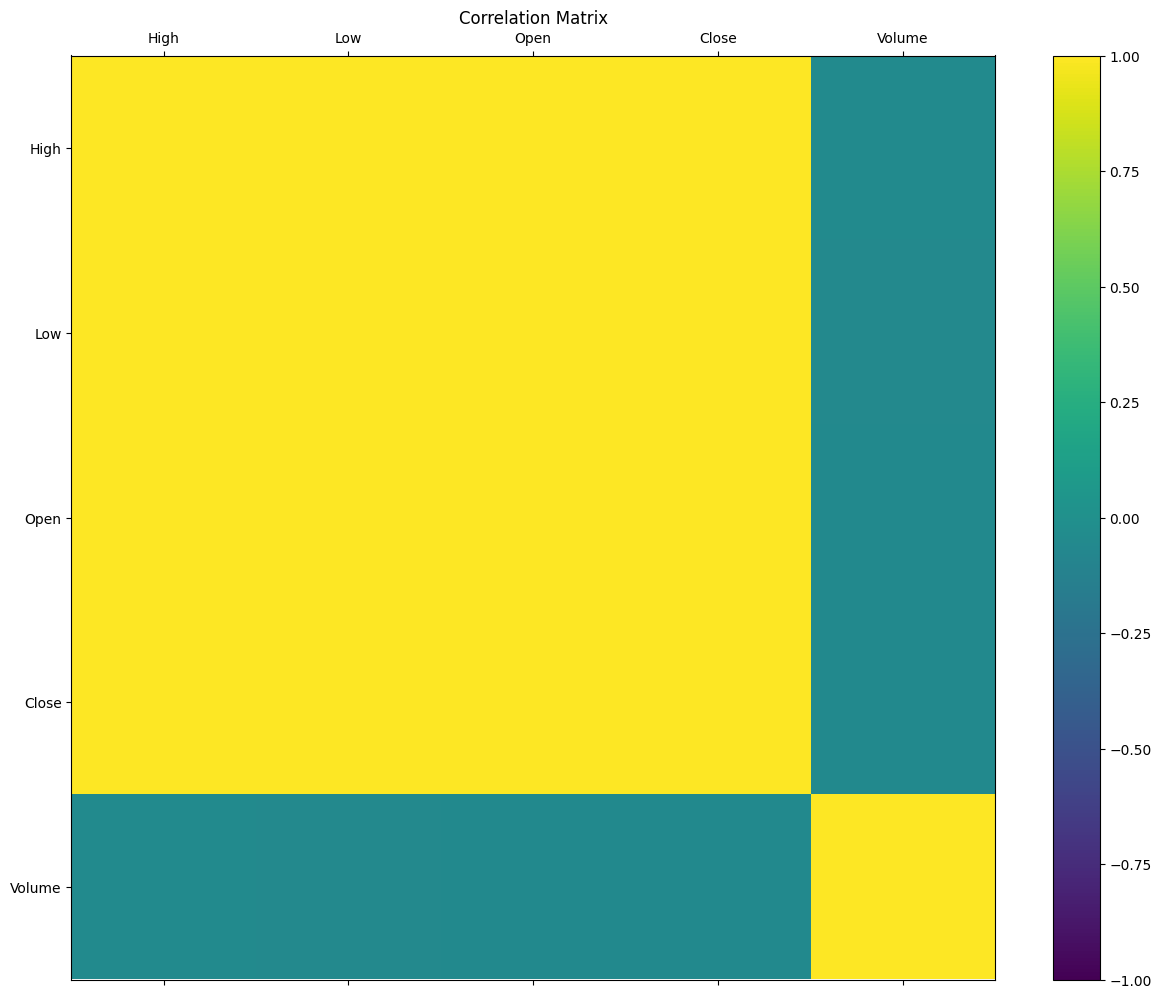

In [59]:
# Example
get_values_correlation(aggregated_stocks.filter(
    (col("company_name")=='INFOSYS.'))
)

Here is our global function to use for our datasets exploration

In [ ]:
def exploration(dataset):
    head_tail_40(dataset)

    get_number_of_observation(dataset)

    get_time_delta(dataset)

    get_statistics(dataset)

    get_values_correlation(dataset)

In [60]:
# Example
# exploration(amazon)

## Exploration of the datasets (part 2)

Computation of the average of the opening and closing prices for each stock price and for
different time periods (week, month, year)

Usage:
* `type` can be set to *week*, *month* or *year* to change the scale used for the average
* `beginDate` can be set to any date present in the dataset where the average computation will begin

In [87]:
def average_opening_closing(dataset, type=None, beginDate=None):
    # if not beginDate:
    #     beginDate = dataset.head().Date
    if type == "week":
        dd = dataset.select('Open', 'Close').filter(dataset.Date < beginDate + timedelta(weeks=1))
    elif type == "month":
        dd = dataset.select('Open', 'Close').filter(dataset.Date < beginDate + timedelta(weeks=4))
    elif type == "year":
        dd = dataset.select('Open', 'Close').filter(dataset.Date < beginDate + timedelta(weeks=52))
    else:
        dd = dataset.select('Open', 'Close')
    dd = dd.withColumn('Result', abs(dataset['Close'] - dataset['Open']))
    dd.select((mean('Result'))).show()

In [88]:
infosys = aggregated_stocks.filter(
    (col("company_name")=='INFOSYS.'))


In [89]:
from pyspark.sql.functions import to_date


In [92]:
# # Example
# average_opening_closing(infosys, type="year", beginDate=to_date(infosys.head(50)[-1].Date, "yyyy-MM-dd")
# )

To study how the stock prices change day to day and month to month, we dediced
to represent *Open*, *High*, *Low* and *Close* column with a candlestick chart.

In [216]:
import plotly.graph_objects as go

def plot_prices_evolution(dataset):
    df = dataset.toPandas().sort_values(['Date'])

    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
    fig.update_xaxes(title_text="Date")
    fig.layout.update(title_text="Infosys Candlestick plot")
    fig.update_yaxes(title_text="Price")
    fig.show()

In [217]:
# infosys.select(F.min(infosys["Date"])).show()

In [218]:
# Example
plot_prices_evolution(infosys)

Based on the opening and closing price, we compute the daily return of a stock.

In [84]:
def compute_daily_return(dataset):
    return dataset.withColumn('daily_return', dataset['Close'] - dataset['Open'])

In [85]:
# Example
compute_daily_return(infosys).show()

+----------+------------+-------+-------+-------+-------+--------+-------------------+
|      Date|company_name|   Open|   High|    Low|  Close|  Volume|       daily_return|
+----------+------------+-------+-------+-------+-------+--------+-------------------+
|2020-09-25|    INFOSYS.|  985.0|  997.0|  977.0|  990.0|118115.0|                5.0|
|2020-10-08|    INFOSYS.|1102.55|1108.85| 1099.0| 1107.6| 64683.0| 5.0499999999999545|
|2020-10-29|    INFOSYS.|1070.25| 1074.0|1066.75|1070.55| 25708.0| 0.2999999999999545|
|2020-11-11|    INFOSYS.| 1107.7|1109.65| 1102.7| 1106.8| 19117.0| -0.900000000000091|
|2020-11-25|    INFOSYS.| 1139.0| 1140.5| 1123.0| 1123.0| 53413.0|              -16.0|
|2019-12-16|    INFOSYS.|  717.4| 717.85|  715.1| 716.75| 75160.0|-0.6499999999999773|
|2019-06-26|    INFOSYS.|  741.3| 743.25|  738.2| 739.35| 40657.0|-1.9499999999999318|
|2019-06-27|    INFOSYS.|  741.0| 744.95|  739.1| 743.25| 49967.0|               2.25|
|2019-07-19|    INFOSYS.|  789.7|  794.4| 7

Let's get the stocks with the highest **daily return** between our datasets:

In [86]:
def get_max_daily_return(datasets):
    max_daily_return = []
    for dataset in datasets:
        name = dataset.head().company_name
        dd = compute_daily_return(dataset)
        max_daily_return.append((name, dd.select(max("daily_return")).collect()))
    return max_daily_return

In [97]:
aggregated_stocks.printSchema()

root
 |-- Date: string (nullable = true)
 |-- company_name: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)



In [100]:
from pyspark.sql.functions import col, max

# Assuming 'High' and 'Low' are the columns representing high and low values
max_return_per_stock = aggregated_stocks.groupBy("company_name").agg(
    max(col("High") - col("Low")).alias("max_return")
)

max_return_per_stock.show()


+--------------------+------------------+
|        company_name|        max_return|
+--------------------+------------------+
|                ITC.|             24.75|
|              WIPRO.| 28.30000000000001|
|TATA CONSULTANCY ...| 255.8499999999999|
|   HCL TECHNOLOGIES.|115.14999999999998|
|            INFOSYS.| 73.79999999999995|
|      TECH MAHINDRA.|              90.0|
|L&T TECHNOLOGY SE...|             240.0|
+--------------------+------------------+



In [222]:
max_return_per_stock.toPandas().to_csv('ind1.csv')

Computation of the average of the daily_return of a stock for
different time periods (week, month, year)

Usage:
* `type` can be set to *week*, *month* or *year* to change the scale used for the average
* `beginDate` can be set to any date present in the dataset where the average computation will begin

In [113]:
def average_daily_return(dataset, type=None, beginDate=None):
    dd = compute_daily_return(dataset)
    if not beginDate:
        beginDate = dd.head().Date
    if type == "week":
        dd = dd.select('daily_return').filter(datetime.strptime(dd.Date,"yyyy-MM-dd") < datetime.strptime(beginDate,"yyyy-MM-dd") + timedelta(weeks=1))
    elif type == "month":
        dd = dd.select('daily_return').filter(dd.Date < beginDate + timedelta(weeks=4))
    elif type == "year":
        # dd = dd.select('daily_return').filter(dd.Date < beginDate + timedelta(weeks=52))
        dd = dd.select('daily_return').filter(datetime.strptime(dd.Date,'%Y-%m-%d') < datetime.strptime(beginDate,'%Y-%m-%d') + timedelta(weeks=52))
    else:
        dd = dd.select('daily_return')
    dd.select((mean('daily_return'))).show()

In [114]:
# from datetime import datetime, timedelta

# # Convert the string date to a datetime object
# start_date = datetime.strptime('2023-10-11', '%Y-%m-%d')

# # Add timedelta to the datetime object
# end_date = start_date + timedelta(weeks=52)

# # Convert the result back to a date
# end_date_as_date = end_date.date()

# print(end_date_as_date)


In [117]:
infosys.Date

Column<b'Date'>

In [ ]:
# Example
# average_daily_return(infosys, type="year")

## Moving average

The moving average is calculated by adding a stock's prices over a certain
period and dividing the sum by the total number of periods.

In [274]:
def moving_average(dataset, column_name, nb_points):
    days = lambda i: i * 86400
    w = (Window.orderBy(col("date").cast("timestamp").cast('long')).rangeBetween(-days(nb_points), 0))
    return dataset.withColumn('moving_average', avg(column_name).over(w))

In [278]:
infosys_pd = moving_average(infosys, 'Open', 10)

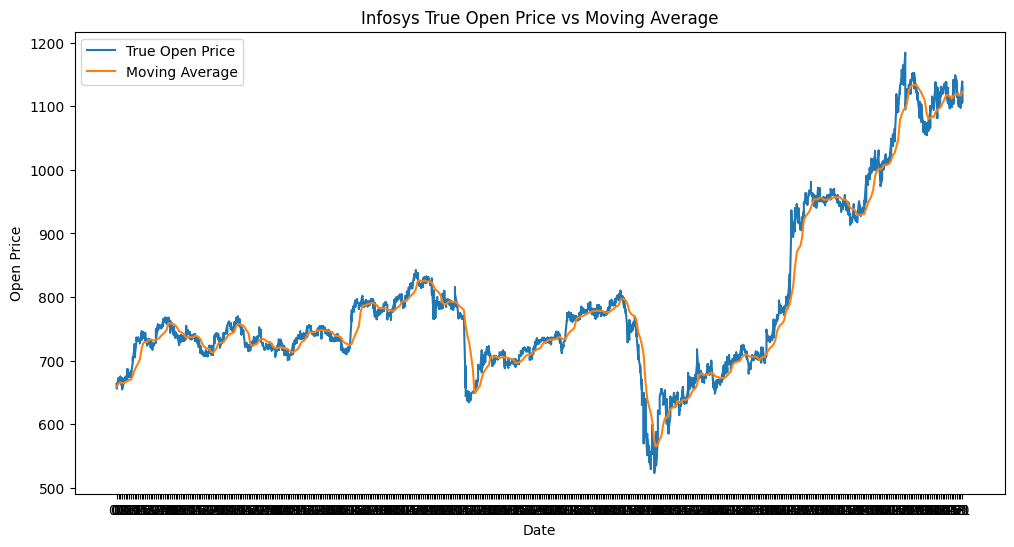

In [279]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter


# Assuming 'date', 'Open', and 'moving_average' are columns in your DataFrame

# Convert to Pandas DataFrame for easier plotting
infosys_pd = infosys_pd.select('date', 'Open', 'moving_average').toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(infosys_pd['date'], infosys_pd['Open'], label='True Open Price')
plt.plot(infosys_pd['date'], infosys_pd['moving_average'], label='Moving Average')
plt.title('Infosys True Open Price vs Moving Average')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
date_format = DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()
plt.show()


## Correlation between datasets

In [120]:
def correlation_two_datasets(stock1, stock2):
    stock_renamed = stock2.select([col(c).alias(c+str(2)) for c in stock2.columns])
    merged = stock1.join(stock_renamed, stock1.Date == stock_renamed.Date2, "left_outer")
    print(f"Correlation between {stock1.head().company_name} and {stock2.head().company_name}:")
    print("Correlation between Open column  : ", round(merged.corr("Open", "Open2") * 100, 2), "%")
    print("Correlation between Close column : ", round(merged.corr("Close", "Close2") * 100, 2), "%")
    print("Correlation between High column  : ", round(merged.corr("High", "High2") * 100, 2), "%")
    print("Correlation between Low column   : ", round(merged.corr("Low", "Low2") * 100, 2), "%")
    print("Correlation between Volume column: ", round(merged.corr("Volume", "Volume2") * 100, 2), "%")

In [121]:
wipro = aggregated_stocks.filter(
    (col("company_name")=='WIPRO.'))


In [234]:
tcs = aggregated_stocks.filter(
    (col("company_name")=='TATA CONSULTANCY SERVICES.'))


itc = aggregated_stocks.filter((col("company_name")=='ITC.'))
hcl = aggregated_stocks.filter((col("company_name")=='HCL TECHNOLOGIES.'))
techm = aggregated_stocks.filter((col("company_name")=='TECH MAHINDRA.'))
lnt = aggregated_stocks.filter((col("company_name")=='L&T TECHNOLOGY SERVICES LIMITE'))


In [122]:
correlation_two_datasets(infosys, wipro)

Correlation between INFOSYS. and WIPRO.:
Correlation between Open column  :  78.09 %
Correlation between Close column :  78.14 %
Correlation between High column  :  78.08 %
Correlation between Low column   :  78.08 %
Correlation between Volume column:  0.61 %


In [224]:
correlation_two_datasets(infosys, tcs)

Correlation between INFOSYS. and TATA CONSULTANCY SERVICES.:
Correlation between Open column  :  89.21 %
Correlation between Close column :  89.24 %
Correlation between High column  :  89.23 %
Correlation between Low column   :  89.2 %
Correlation between Volume column:  1.88 %


In [225]:
def get_datasets_merged(datasets):
    suffix = 0
    res = datasets[0].select("*")
    res = res.select([col(c).alias(c+str(suffix)) for c in res.columns])
    suffix += 1
    for i in range(len(datasets) -1):
        stock_renamed =  datasets[i+1].select([col(c).alias(c+str(suffix)) for c in datasets[i+1].columns])
        res = res.join(stock_renamed, res.Date0 == stock_renamed["Date" + str(suffix)], how="left_outer")
        suffix += 1
    return res

In [235]:
datasets = [infosys,wipro,tcs,itc,hcl,techm,lnt]

In [236]:
# Example
get_datasets_merged(datasets).show()

+----------+-------------+-----+-----+-----+------+--------+----------+-------------+-----+------+-----+------+-------+----------+--------------------+------+-------+------+------+-------+----------+-------------+------+------+-----+------+--------+----------+-----------------+-----+------+------+------+-------+----------+--------------+------+------+------+------+-------+----------+--------------------+-------+-------+------+-------+-------+
|     Date0|company_name0|Open0|High0| Low0|Close0| Volume0|     Date1|company_name1|Open1| High1| Low1|Close1|Volume1|     Date2|       company_name2| Open2|  High2|  Low2|Close2|Volume2|     Date3|company_name3| Open3| High3| Low3|Close3| Volume3|     Date4|    company_name4|Open4| High4|  Low4|Close4|Volume4|     Date5| company_name5| Open5| High5|  Low5|Close5|Volume5|     Date6|       company_name6|  Open6|  High6|  Low6| Close6|Volume6|
+----------+-------------+-----+-----+-----+------+--------+----------+-------------+-----+------+-----+--

In [237]:
# Correlation matrix plot function
def plot_corr_matrix_column(fig, ax, correlations, attr, column_name):
    mat = ax.matshow(correlations, vmax=1, vmin=-1)
    ax.set_xticks(range(len(attr)), attr, rotation=45)
    ax.set_yticks(range(len(attr)), attr )
    ax.set_title(f"{column_name}");
    return mat

In [238]:
[column[0] for column in datasets[0].dtypes if column[1] == "double"]

['Open', 'High', 'Low', 'Close', 'Volume']

In [280]:
def datasets_correlation(datasets):
    column_names = [i[0] for i in datasets[0].dtypes if i[1]=='double']
    merged = get_datasets_merged(datasets)
    matrix = np.zeros(shape=(len(datasets), len(datasets)))
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle("Correlation Matrix", fontsize=20)
    for k, ax in enumerate(axes.flat):
        for i in range(len(datasets)):
            for j in range(len(datasets)):
                matrix[i][j] = merged.corr(column_names[k] + str(i), column_names[k] + str(j))
        mat = plot_corr_matrix_column(fig, ax, matrix, [dataset.head().company_name for dataset in datasets], column_names[k])
    plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0.8,
                    hspace=0.2)
    fig.colorbar(mat, ax=axes)

In [ ]:
datasets_correlation(datasets)

In [242]:
def get_return_rate_specific_date(dataset, timedelta, date):
    initial_value = dataset.select(['date', 'Close']).filter(dataset.Date == date - timedelta).first()
    current_value = dataset.select(['date', 'Close']).filter(dataset.Date == date).first()
    return ((current_value.Close - initial_value.Close) / initial_value.Close) * 100 if initial_value else None

In [165]:
def get_return_rate(dataset, cat="week"):
    if cat == "week":
        sample = 'W'
    elif cat == "month":
        sample = 'M'
    elif cat == "year":
        sample = 'Y'
    elif cat == "day":
        sample = 'D'
    df = dataset.toPandas()
    df.set_index("Date", inplace=True)
    return df['Close'].resample(sample).ffill().pct_change()

In [ ]:
get_return_rate(amazon, 'month')

/content/spark-3.0.3-bin-hadoop2.7/python/pyspark/sql/pandas/conversion.py:175: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead



Date
2017-01-31         NaN
2017-02-28    0.026182
2017-03-31    0.049110
2017-04-30    0.043371
2017-05-31    0.075276
2017-06-30   -0.026764
2017-07-31    0.020434
2017-08-31   -0.007269
2017-09-30   -0.019631
2017-10-31    0.149717
2017-11-30    0.064662
2017-12-31   -0.006187
2018-01-31    0.240639
2018-02-28    0.042429
2018-03-31   -0.043049
2018-04-30    0.082075
2018-05-31    0.040539
2018-06-30    0.043065
2018-07-31    0.045676
2018-08-31    0.132365
2018-09-30   -0.004824
2018-10-31   -0.202192
2018-11-30    0.057672
2018-12-31   -0.111350
2019-01-31    0.144317
2019-02-28   -0.045906
2019-03-31    0.085936
2019-04-30    0.081859
2019-05-31   -0.078613
2019-06-30    0.066792
2019-07-31   -0.014179
2019-08-31   -0.048474
2019-09-30   -0.022733
2019-10-31    0.023475
2019-11-30    0.013587
2019-12-31    0.026122
2020-01-31    0.087064
2020-02-29   -0.062214
2020-03-31    0.035021
2020-04-30    0.268900
2020-05-31   -0.012785
2020-06-30    0.129567
2020-07-31    0.147114
2020-0

In [143]:
def get_best_return_rate(datasets, start_date, cat="month"):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if cat == "month":
        t_delta = timedelta(weeks=4)
    elif cat == "year":
        t_delta = timedelta(weeks=52)
    max_return_rate = None
    for dataset in datasets:
        return_rate = get_return_rate_specific_date(dataset, t_delta, start_date)
        if return_rate and (not max_return_rate or return_rate > max_return_rate[1]):
            max_return_rate = (dataset.head().company_name, return_rate)
    if max_return_rate:
        print(f"Max return is from {max_return_rate[0]} : {max_return_rate[1]}")
    return max_return_rate


In [145]:
get_best_return_rate(datasets, "2017-02-19", 'month')

## Insights

### 1 - Price data

Close price evolution for each stocks depending on the date.

In [247]:
def plot_price_data(dataset):
    fig = plt.figure(figsize=(15, 10))
    for dataset in datasets:
        df_daily = dataset.toPandas().sort_values(['Date'])
        df_daily.set_index('Date', inplace=True)

        df_daily['Close'].plot(label=dataset.head().company_name)

    plt.gcf().autofmt_xdate()
    plt.legend()

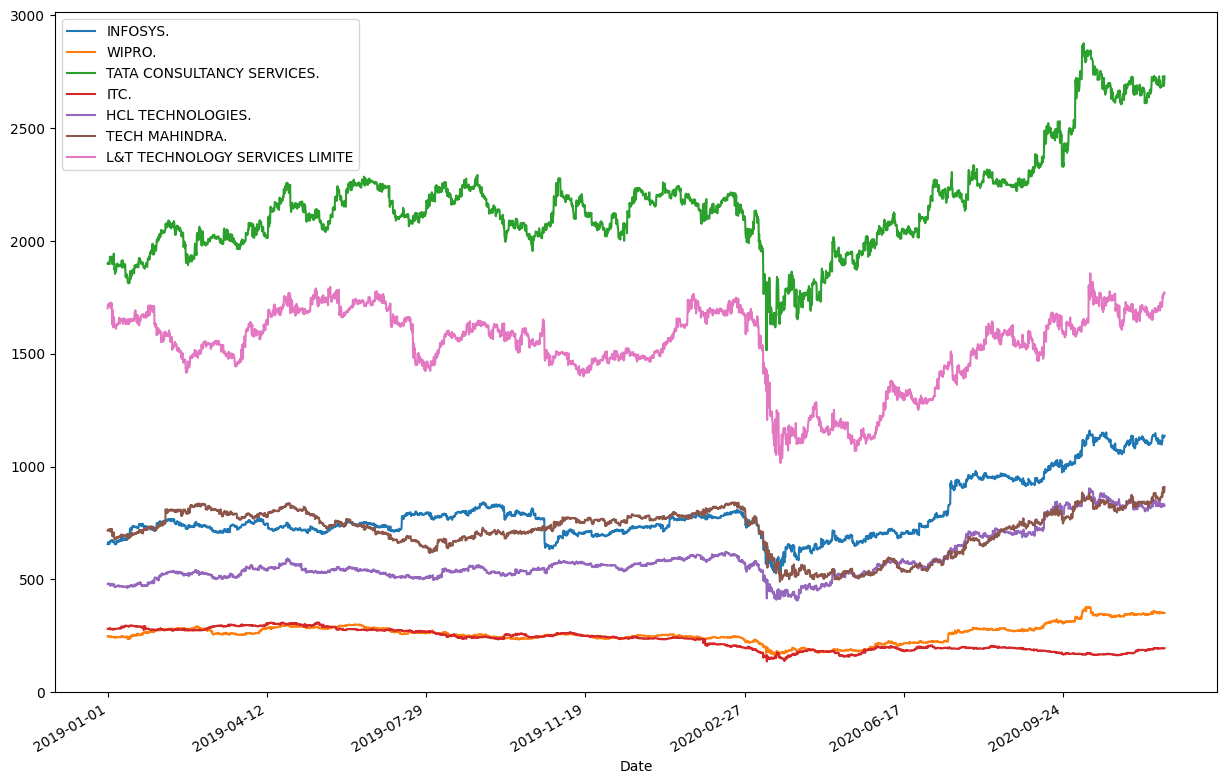

In [248]:
plot_price_data(datasets)

In [249]:
def return_percentage(datasets):

    fig = plt.figure(figsize=(15, 5))
    for dataset in datasets:
        df_daily = dataset.toPandas().sort_values(['Date'])
        df_daily.set_index('Date', inplace=True)
        stock_daily_returns = df_daily['Close'].pct_change()

        (stock_daily_returns + 1).cumprod().plot(label=dataset.head().company_name)

    plt.gcf().autofmt_xdate()
    plt.legend()

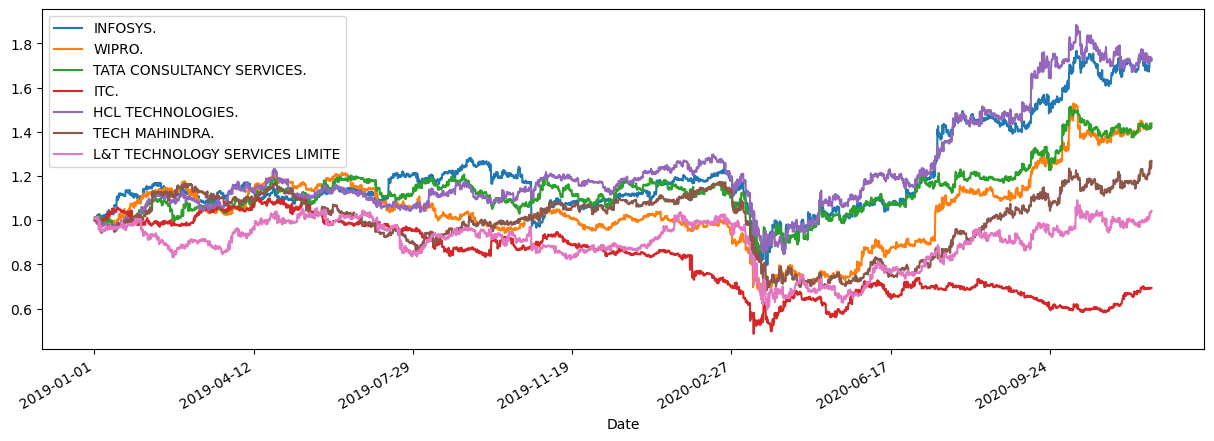

In [250]:
return_percentage(datasets)